In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import random 
from data_generating_process import *
##############################################
#set the pd output value
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
#Define euclidean distance:
def l2distance(X,Z):
    '''We express the squared euclidean distance given by: D_ij = (x_i - z_i)*(x_i-z_i).T
    We can also express the distance in some linear combination as follows:
    D = S + R - 2G, where
    S = x_i*x_i^T
    R = z_j * z_j^T
    G = dot(X,Z.T)'''
    
    n,d1=X.shape
    m,d2=Z.shape
    assert (d1==d2), "Dimensions of input vectors must match!"
    
    S = np.sum(X*X,axis=1)[:, np.newaxis] 
    R = np.sum(Z*Z,axis=1)
    G = np.dot(X,Z.T)
    
    D2 = S + R - 2*G
    D2[D2<0]=0
    D = np.sqrt(D2) 
    
    return D

In [3]:
def findknn(xTr,xTe,k):
    """
    Here we use the function to calculate the euclidean distance between some training data 
    and some test data and return the index. We also specify the number of nearest neighbors:
    """
    d = l2distance(xTr,xTe) #calculate euclidean distance
    
    #Use sort to find neighbors:
    dist = np.sort(d, axis=0)[:k] #find k nearest neighbors
    index = np.argsort(d, axis=0)[:k] #find index of neighbors
    
    return index, dist

In [4]:
def knnclassifier(xTr,yTr,xTe,k):
    """
    We find the nearest neigbors(s) and return our predictions for some test data:
    """
    def mode(a):
        return (max(a,key=a.count))
    # fix array shapes
    yTr = yTr.flatten()
    
    index, dist = findknn(xTr,xTe,k) #return index and distance
    predictions = [] #empty list for saving preidction output
 
    for i,v in enumerate(index.T): #loop through all indexes (but transposed to have index as we need it)
        predictions.append(mode((yTr[v]).tolist())) #find index from clostest neighbor(s) and return the label    
    
    return np.array(predictions) #return array of predictions

In [5]:
def accuracy(truth,preds):
    """
    Calculate a zero-one loss as accuracy:
    """
    truth = truth.flatten()
    preds = preds.flatten()
    count = 0
    
    #Loop through all true values:
    for i,v in enumerate(truth):
        if truth[i] == preds[i]: #create 0/1 loss depending on if true equals prediction
              count += 1
    acc = count/len(truth) #calculate share of correctly classified cases
    
    return np.float64(acc) #return accuracy as float64

In [17]:
#Generate Hight and Weight of Women and Men as our features. Label is given by gender:
sample_size = 1000
y = data_generating_process(sample_size, 2) 
w_xtrain,w_train_label = y.women_data()
m_xtrain,m_train_label = y.men_data()

features_train, labels_train = y.stacking(w_xtrain,w_train_label,m_xtrain,m_train_label)

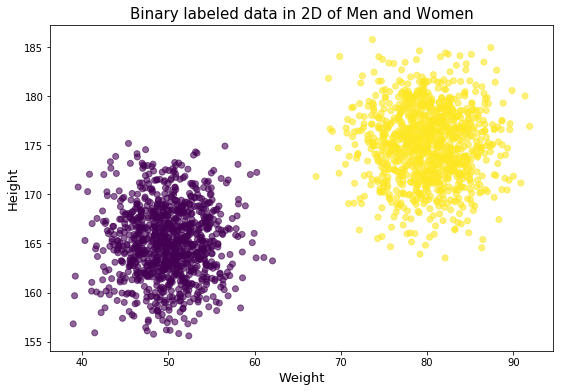

In [18]:
# We can visualize these data distributions
plt.figure(figsize=(9, 6))
plt.scatter(features_train[:, 0], features_train[:, 1],
            c = labels_train, alpha = .6);
plt.title("Binary labeled data in 2D of Men and Women", size=15);
plt.xlabel("Weight", size=13);
plt.ylabel("Height", size=13);

In [8]:
#Generate some test data from the same distributions:
sample_size = 100
y = data_generating_process(sample_size, 2) 
w_data,w_label = y.women_data()
m_data,m_label = y.men_data()

features_test, labels_test = y.stacking(w_data,w_label,m_data,m_label)

In [9]:
#Find knn using 3 neighbors:
k = 3
preds = knnclassifier(features_train, labels_train, features_test,k)

In [10]:
#Return accuracy of predictions:
accuracy(labels_test,preds)

1.0

In [24]:
#Use data that does not come from the same distribution as our training data:
#Generate some test data from the same distributions:
sample_size = 100
y = data_generating_process(sample_size, 2) 
w_data,w_label = y.alien_men_data()
m_data,m_label = y.alien_women_data()

features_test, labels_test = y.stacking(w_data,w_label,m_data,m_label)

In [25]:
#Find knn using 3 neighbors:
k = 3
preds = knnclassifier(features_train, labels_train, features_test,k)

#Return accuracy of predictions:
accuracy(labels_test,preds)

0.095

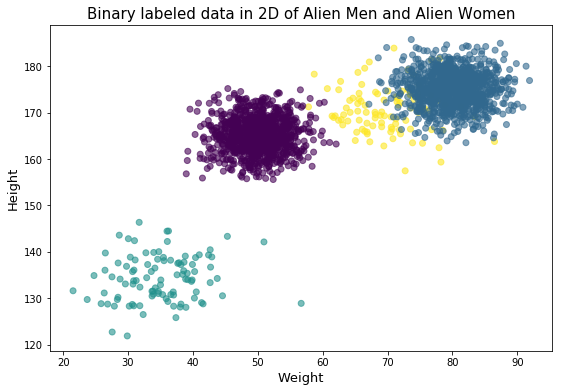

In [29]:
# We can visualize these data distributions
w_label = w_label +1
m_label = w_label +3

features_test, labels_test = y.stacking(w_data,w_label,m_data,m_label)
features_all, labels_all = y.stacking(features_test, labels_test,features_train, labels_train)

plt.figure(figsize=(9, 6))
plt.scatter(features_all[:, 0], features_all[:, 1],
            c = labels_all, alpha = .6);
plt.title("Binary labeled data in 2D of Alien Men and Alien Women", size=15);
plt.xlabel("Weight", size=13);
plt.ylabel("Height", size=13);